# Gaussian Process Regression: Sine Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import pairwise_distances

## Generate Sine Data Set

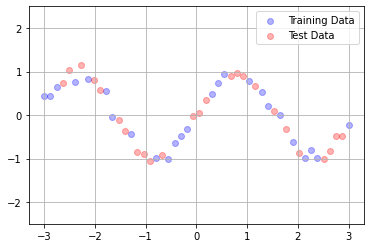

In [2]:
np.random.seed(1)
x = np.linspace(-3,3,50).reshape(-1,1)
y = np.sin(2*x) + 0.1*(np.random.randn(x.size,1))

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)

def plotData(X_train,X_test,y_train,y_test):
    plt.scatter(X_train,y_train,color='b',alpha=0.3,label='Training Data')
    plt.scatter(X_test,y_test,color='r',alpha=0.3,label='Test Data')
    plt.ylim([-2.5, 2.5])
    plt.grid()
    
plotData(X_train, X_test, y_train, y_test)
plt.legend()
plt.show()

## Create GPR class

In [3]:
class GPRegression:
    def __init__(self, X_train, y_train, sigma, gamma):
        self.X_train = X_train
        self.y_train = y_train
        self.N_train = X_train.shape[0]
        self.sigma = sigma
        self.gamma = gamma
        self.K = self.kernel_func(X_train.reshape(-1,1),
                                  X_train.reshape(-1,1))
        
    def kernel_func(self, x1, x2):
        return np.exp(-self.gamma * pairwise_distances(x1, x2, metric='sqeuclidean'))

    def predict(self, x):
        # For k(x), a single sample x should be reshaped for pairwise distances to work 
        kx = self.kernel_func(x.reshape(1,-1), self.X_train.reshape(-1,1))
        kxx = self.kernel_func(x.reshape(1,-1), x.reshape(1,-1))
        C = np.linalg.inv(self.K + self.sigma ** 2 * np.eye(self.N_train))
        mu = kx @ C @ self.y_train                  # Eq. (6.66), PRML
        sd = kxx + self.sigma ** 2 - kx @ C @ kx.T  # Eq. (6.67), PRML
        return mu, np.sqrt(sd)

Perform sequential fitting

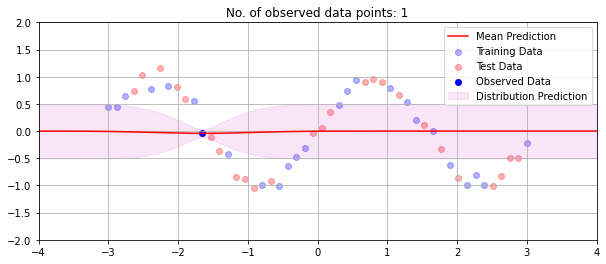

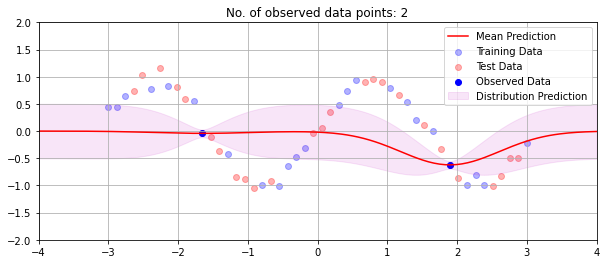

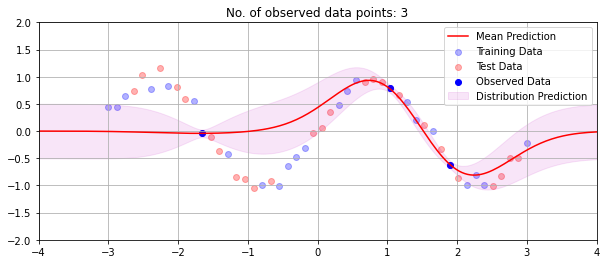

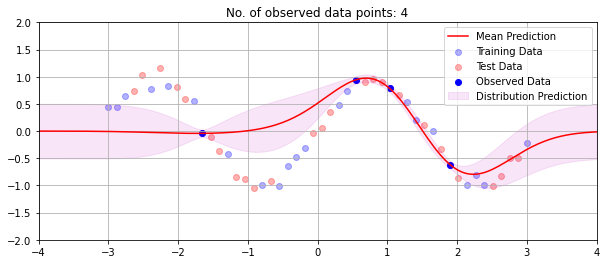

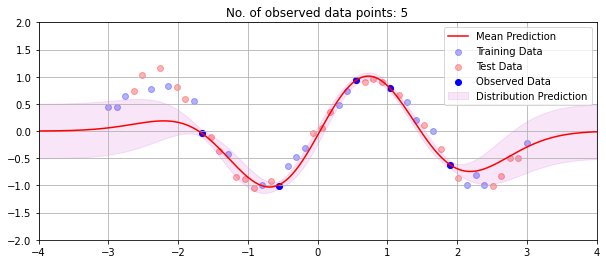

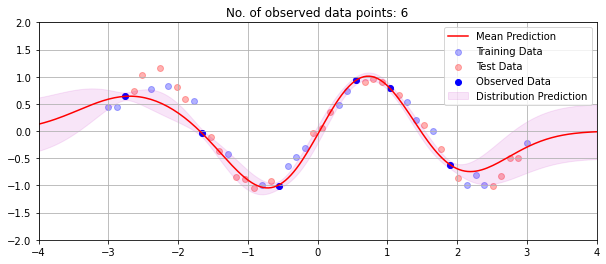

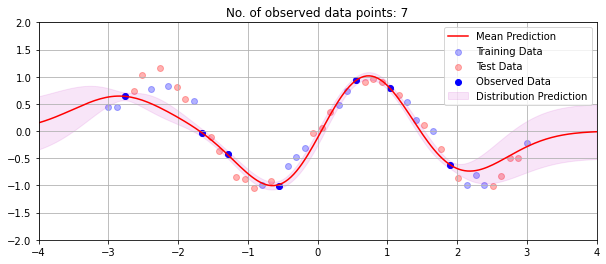

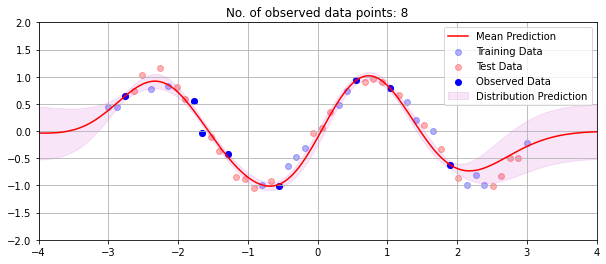

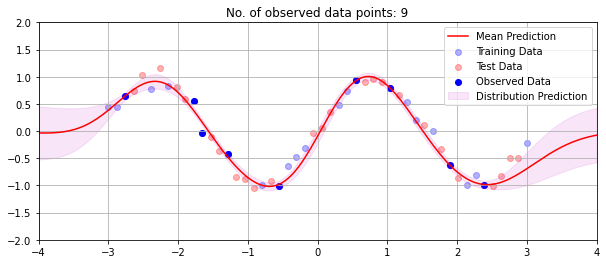

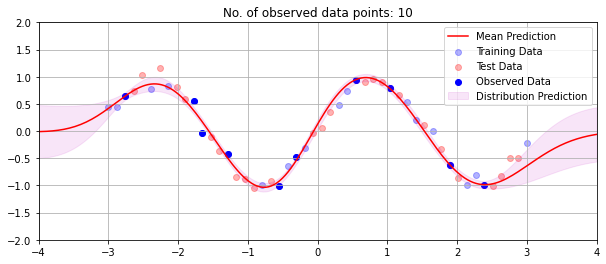

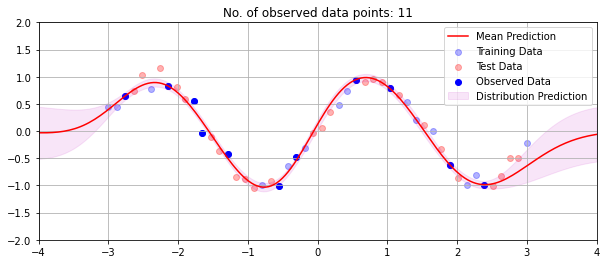

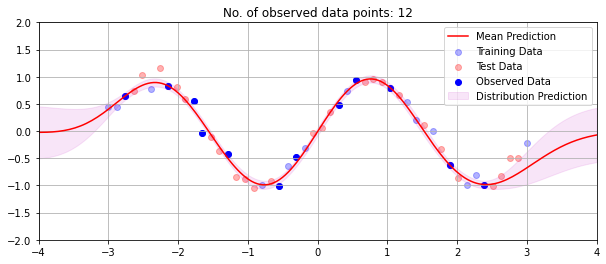

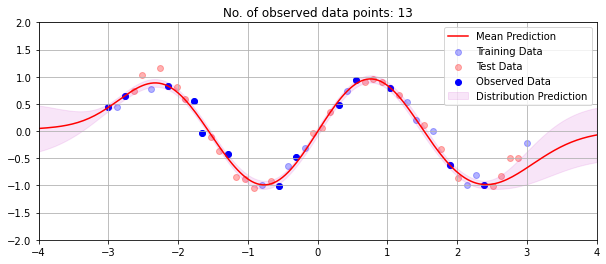

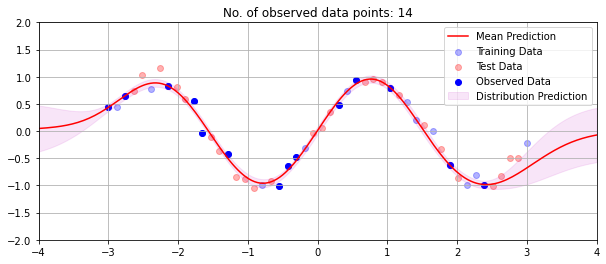

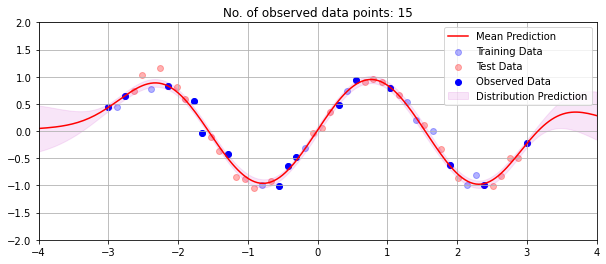

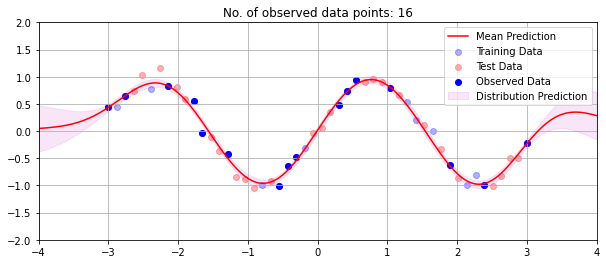

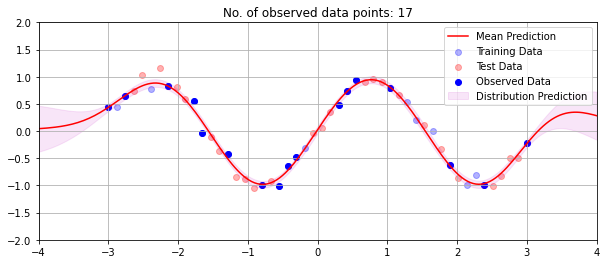

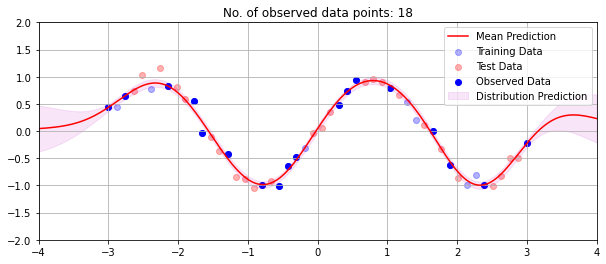

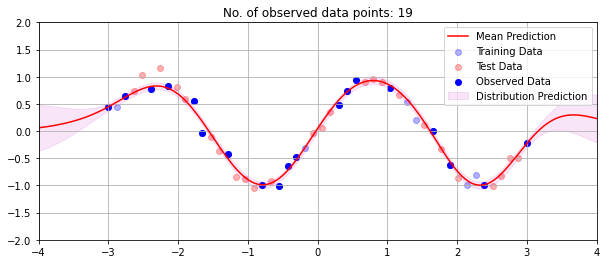

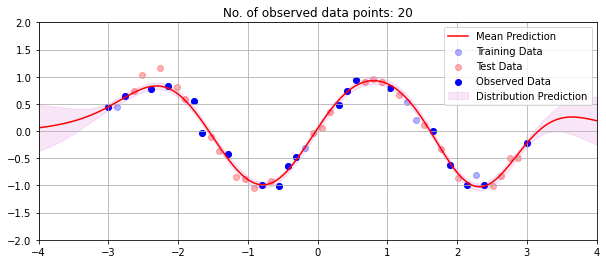

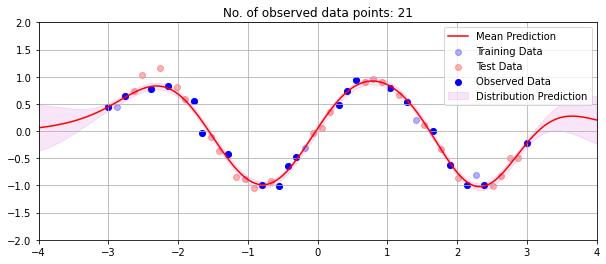

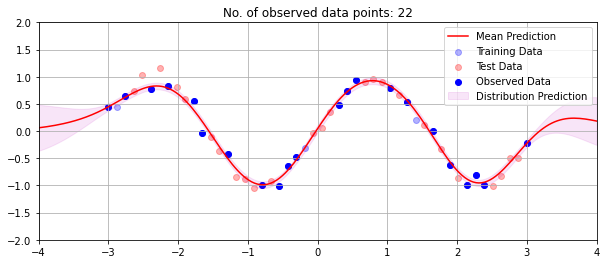

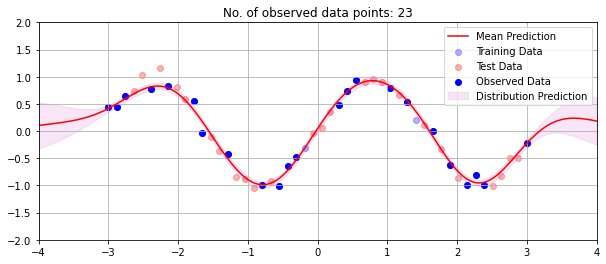

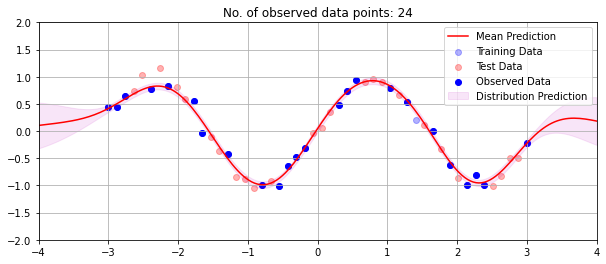

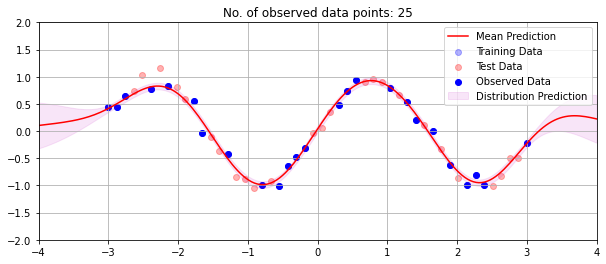

In [4]:
N = len(X_train)

# Permute rows of X_train randomly
new_indices = np.random.choice(N, N, replace=False)
X_train = X_train[new_indices]
y_train = y_train[new_indices]

X_fine = np.linspace(-4,4,200)

for i in range(N):
    mdl = GPRegression(X_train[:i+1], y_train[:i+1], sigma=0.1, gamma=1)
    
    y_pred_fine = np.zeros(X_fine.shape)
    sd_pred_fine = np.zeros(X_fine.shape)
    
    for j in range(len(X_fine)):
        y_pred_fine[j], sd_pred_fine[j] = mdl.predict(X_fine[j])

    plt.figure(figsize=(10,4))
    plotData(X_train, X_test, y_train, y_test)
    plt.scatter(X_train[:i+1], y_train[:i+1], 
                c='b', label='Observed Data')
    plt.plot(X_fine, y_pred_fine, 'r', label='Mean Prediction')
    
    # Draw the filled uncertainty
    p1 = 0.5 * sd_pred_fine + y_pred_fine
    p2 = -0.5 * sd_pred_fine + y_pred_fine
    plt.fill_between(X_fine, p1, p2, color='m', 
                     alpha=0.1, label='Distribution Prediction')
    plt.axis([-4, 4, -2, 2])
    plt.title(f'No. of observed data points: {i+1}')
    plt.legend(loc='upper right')
    plt.show()